<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


,sex,mean_income
0,female,186.293096
1,male,349.037571


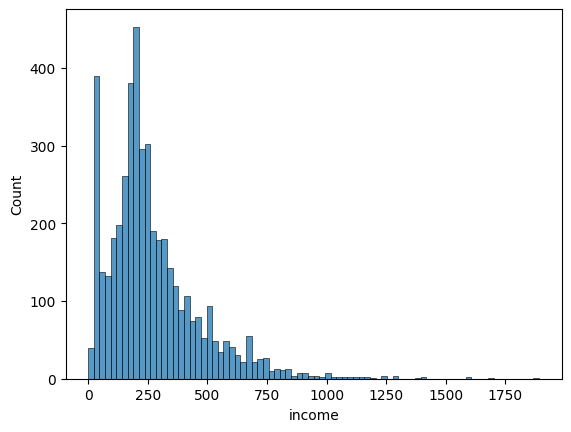

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
# 데이터 불러오기
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

# 복수본 만들기
welfare = raw_welfare.copy()

# 데이터 검토하기
welfare # 앞부분, 뒷부분 출력
welfare.shape # 행, 열 개수 출력
welfare.info() # 변수 속성 출력
welfare.describe() # 요약 통계량

welfare = welfare.rename(columns = {
    'h14_g3' : 'sex',
    'h14_g4' : 'birth',
    'h14_g10' : 'marriage_type',
    'h14_g11' : 'religion',
    'p1402_8aq1' : 'income',
    'h14_eco9' : 'code_job',
    'h14_reg7' : 'code_region'
})

# 1단계 - 변수 검토 및 전처리
# * 분석에 활용할 변수 전처리
#   * 변수의 특징 파악, 이상치와 결측치 정제
#   * 변수의 값을 다루기 편하게 바꾸기
# * 분석에 활용할 변수 각각 전처리
#   * ex) 성별에 따른 월급 차이: 성별, 월급 각각
# 2단계 - 변수 간 관계 분석
# * 변수 간 관계 분석
#   *데이터 요약 표, 그래프 만들기
#   *분석 결과 해석

# 성별 변수 검토 및 전처리하기
# 1. 변수 검토하기
welfare['sex'].dtypes # 변수 타입 출력

# 2. 전처리하기
# 이상치 확인
welfare['sex'].value_counts() # 빈도 구하기

# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

# 성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()


# 월급 변수 검토 및 전처리하기
# 1. 변수 검토하기
welfare['income'].dtypes # 변수 타입 출력

welfare['income'].describe() # 요약 통계량 구하기

sns.histplot(data = welfare, x = 'income')

# 2. 전처리하기
welfare['income'].describe() # 이상치 확인

welfare['income'].isna().sum() # 결측치 확인

## 성별 월급 평균표 만들기
sex_income = welfare.dropna(subset = ['income']).groupby('sex', as_index = False).agg(mean_income = ('income', 'mean')) # income 평균 구하기

sex_income

# 막대 그래프 만들기
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')
